# Implementation Of Simple Linear Regression Algorithm

In [133]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

### Importing and Splitting of Dataset into Train and Test..

In [134]:
df = pd.read_csv(r"C:\Users\Dell\dataSets\placement.csv")
df.head(6)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99


In [135]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
X.shape, y.shape

((200,), (200,))

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [137]:
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (160,)
y_train shape :  (160,)
X_test shape :  (40,)
y_test shape :  (40,)


## Writing our Own LinearRegression() Class

In [138]:
class MyLR:
    def __init__(self):
        self.m = None  # weight or slop or coefficient
        self.b = None  # intercept
        
    def fit(self, X_train, y_train):
        
        num = 0
        den = 0 
        # simply using the Mathematical formula from Simple linear resgression
        
        for i in range(X_train.shape[0]):
            
            num = num + ((y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean()))
            
            den = den + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))
            
        self.m = num / den
        
        self.b = y_train.mean() - (self.m * X_train.mean())
        
        print("Co-efficient/Weights : ", self.m)
        print("Intercept : ", self.b)
        
    def predict(self, X_test):
        return self.m * X_test + self.b

### Working with MyLR() Class

In [153]:
# creating class object and trainning of the dataset..
lr = MyLR()
lr.fit(X_train, y_train)

Co-efficient/Weights :  0.5579519734250721
Intercept :  -0.8961119222429152


In [154]:
# predicting the Values from test dataset..
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

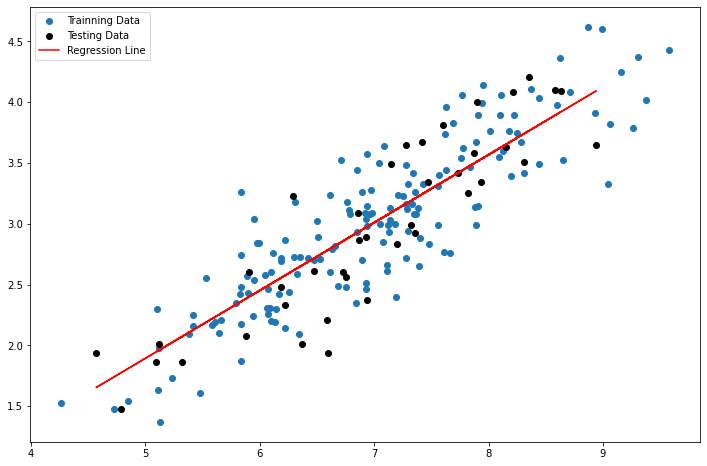

In [157]:
# plotting the graph of Trainning and Test Data with the Regression Line..
plt.figure(figsize = (12,8))
plt.scatter(X_train,y_train, label = "Trainning Data")
plt.scatter(X_test,y_test, c = 'black', label = "Testing Data")
plt.plot(X_test, y_pred, color = "red", label = "Regression Line")
plt.legend()
plt.show()

In [142]:
# calculating the Mean_squared_Error and the R2_Score of Our Model..
print("MSE :", mean_squared_error(y_test, y_pred))
print("Score :", r2_score(y_test, y_pred))

MSE : 0.12129235313495523
Score : 0.7807301475103842


### Comparing With SciKit_Learn's LinearRegression() Class.

In [146]:
lr2 = LinearRegression()
lr2.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))
y_pred2 = lr2.predict(np.array(X_test).reshape(-1,1))
y_pred2

array([[3.89111601],
       [3.09324469],
       [2.38464568],
       [2.57434935],
       [1.6537286 ],
       [1.77647803],
       [2.07219258],
       [2.93143862],
       [3.76278706],
       [2.93701814],
       [4.09197872],
       [3.51170867],
       [2.97049525],
       [2.40138424],
       [3.18809652],
       [3.46707251],
       [1.94386362],
       [3.24389172],
       [2.97607477],
       [3.41685683],
       [2.55761079],
       [3.16577844],
       [2.85890486],
       [3.12114229],
       [3.68467378],
       [2.8700639 ],
       [3.49497011],
       [3.34432308],
       [3.91901361],
       [1.96060218],
       [3.65119666],
       [3.2104146 ],
       [3.74046898],
       [2.7863711 ],
       [2.78079158],
       [3.27178932],
       [3.52844723],
       [2.61340599],
       [2.65804215],
       [2.71383735]])

In [147]:
print("MSE :", mean_squared_error(y_test, y_pred2))
print("Score :", r2_score(y_test, y_pred2))

MSE : 0.12129235313495527
Score : 0.780730147510384


#### Observe the fact that our MyLR() class is giving the same accuracy as Scikit_Learn's LinearRegression() Class